In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random
import seaborn as sns
from config import api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List from citipy library

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
#lat is the first component in lat_lng, hence [0]; lng is the second component in lat_lng, hence [1]

for lat_lng in lat_lngs:
    lat = lat_lng[0] 
    lng = lat_lng[1] 
    city = citipy.nearest_city(lat, lng).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

## Perform OpenWeather API calls to pull the weather data for the cities found with citipy 

In [4]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
url = base_url + api_key 
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa'

In [36]:
#create empty list to store city weather data
city_weather_data = []

#begin for loop; make an API request for every city in cities

for city in cities: 
    #create a url incorporating city name as the query
    city_url = url + "&q=" + city
    
    response = requests.get(city_url).json()
    
    #make API request    
    try:
        city_name = city
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_temp = response["main"]["temp"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        
        #append data to city_weather_data list; 
        
        city_weather_data.append({
            "City": city_name,
            "Lat" : city_lat,
            "Lng" : city_lng,
            "Temp" : city_temp,
            "Humidity": city_humidity,
            "Cloudliness" : city_clouds,
            "Wind Speed" : city_wind             
        })
        
        print(f"The city namr url: {city_url}")       
                
    except:
        print("City not found.")         
        

The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=ilesha
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=klaksvik
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=chuy
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=nemuro
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=matara
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=fortuna
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=punta arenas
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235

The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=atar
City not found.
City not found.
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=busselton
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=ende
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=novoagansk
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=baykit
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=esperance
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=nacala
The city namr url: http://api.openweathermap.org/data/2.5/w

The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=tura
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=the valley
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=dingle
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=leirvik
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=seoul
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=forestville
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=saskylakh
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

City not found.
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=tual
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=talcahuano
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=luderitz
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=kralendijk
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=aykhal
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=matay
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=tongliao
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=

The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=hovd
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=calama
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=kiboga
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=sibut
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=faya
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=port-gentil
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=meulaboh
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c6

The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=kungurtug
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=saint george
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=kozhva
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=tezu
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=puerto parra
City not found.
City not found.
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=kruisfontein
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=pandan niog
The city namr url: http://api.openweather

The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=saldanha
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=turukhansk
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=ikongo
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=kirakira
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=cristalina
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=linqiong
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=kaabong
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=sarakhs
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=bretzfeld
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=sambava
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=dunedin
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=poum
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=alice town
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=lekoni
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23

The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=ayodhya
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=puerto baquerizo moreno
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=trinidad
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=balkhash
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=hede
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=moussoro
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=ouegoa
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imp

The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=homer
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=caranavi
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=akdepe
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=karaidel
City not found.
City not found.
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=blagoyevo
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=harper
The city namr url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=235823c66b8e95582364cb14422343fa&q=haines junction
The city namr url: http://api.openweathermap.org/d

In [37]:
len(city_weather_data)

573

In [62]:
#creating dataframe with city weather data
city_data_df = pd.DataFrame(city_weather_data)
city_data_df

,City,Cloudliness,Humidity,Lat,Lng,Temp,Wind Speed
0,ilesha,24,86,7.14,5.26,81.19,7.65
1,klaksvik,8,93,62.23,-6.59,51.80,14.99
2,chuy,0,91,-33.69,-53.46,51.94,13.02
3,nemuro,75,82,43.32,145.57,57.20,6.93
4,matara,75,55,-13.74,-72.90,33.80,2.39
5,fortuna,20,58,38.18,-1.13,87.85,9.17
6,punta arenas,90,100,-53.16,-70.91,32.00,5.82
7,cape town,75,66,-33.93,18.42,55.40,8.05
8,lebu,40,60,8.96,38.73,68.00,4.70
9,alamosa,1,87,37.47,-105.87,57.20,5.82


In [39]:
city_data_df.to_csv("WorldWeatherData.csv", index=False)

## Use Matplotlib to plot data


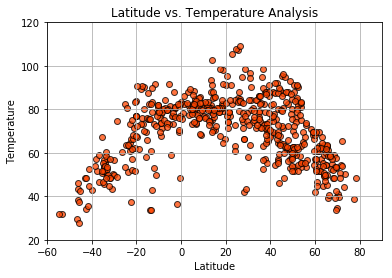

In [76]:
#latitude vs. temp (sns.scatterplot(x_axis, y_axis))
plt.scatter(city_data_df["Lat"], city_data_df["Temp"], alpha = 0.75, facecolors="orangered", edgecolors="black")
plt.title("Latitude vs. Temperature Analysis")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.xlim(-60, 90, 10)
plt.ylim(20, 120, 10)
plt.savefig("lat_vs_temp_fig.png")
plt.show()

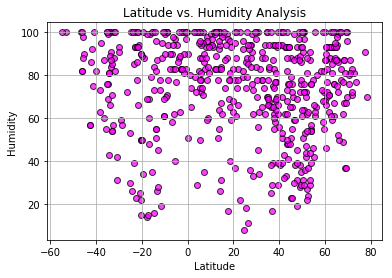

In [65]:
#latitude vs. humidity; 
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha = 0.75, facecolors="magenta", edgecolors="black")
plt.title("Latitude vs. Humidity Analysis")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("lat_vs_humidity_fig.png")
plt.show()

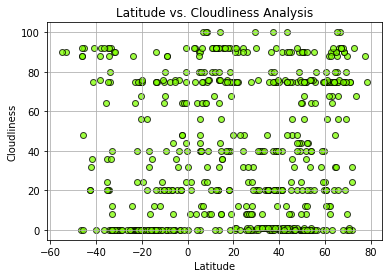

In [66]:
#latitude vs. cloudliness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudliness"], alpha = 0.75, facecolors="chartreuse", edgecolors="black")
plt.title("Latitude vs. Cloudliness Analysis")
plt.ylabel("Cloudliness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("lat_vs_Cloudliness_fig.png")
plt.show()

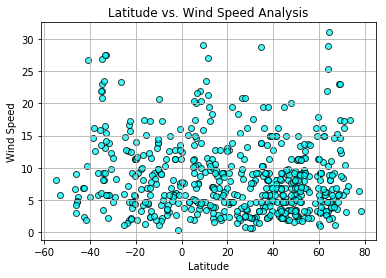

In [67]:
#latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha = 0.75, facecolors="aqua", edgecolors="black")
plt.title("Latitude vs. Wind Speed Analysis")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("WindSpeed vs. Latitude Analysis_fig.png")
plt.show()